In [1]:
# import packages
import GEOparse
import numpy as np
import pandas as pd
import scanpy as sc
import scipy as sp
import anndata
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import scanpy.external as sce

## Importing microglia data

In [2]:
# read in genes by cells raw count data
adata_ctrl = sc.read_text('/Users/Joyce/Documents/COLUMBIA/COLUMBIA MS/BMEN4480/Final Project/GSE115571_RAW/GSM3182555_CTRL.txt', 
                          first_column_names = True)
adata_lps = sc.read_text('/Users/Joyce/Documents/COLUMBIA/COLUMBIA MS/BMEN4480/Final Project/GSE115571_RAW/GSM3182556_LPS.txt', 
                          first_column_names = True)

In [3]:
# transpose to cells x genes
adata_ctrl = adata_ctrl.transpose()
adata_lps = adata_lps.transpose()

In [4]:
adata_ctrl.shape

(9999, 16247)

In [5]:
adata_lps.shape

(9999, 16501)

In [6]:
# annotate as ctrl or lps
adata_ctrl.obs['group'] = 'control'
adata_lps.obs['group'] = 'lps'

In [7]:
# concatenate
adata = anndata.concat([adata_ctrl,adata_lps],join='outer',fill_value=0)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [8]:
adata

AnnData object with n_obs × n_vars = 19998 × 18322
    obs: 'group'

## QC filtering

In [9]:
sc.pp.calculate_qc_metrics(adata,expr_type='counts',inplace=True)

/Users/Joyce/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_qc.py:422: RuntimeWarning: invalid value encountered in true_divide
  return values / sums[:, None]


In [10]:
# filter out cells with less than 1000 counts & genes not expressed in at least 1 cell
sc.pp.filter_cells(adata, min_counts = 1000)
sc.pp.filter_genes(adata, min_cells = 1)

In [11]:
adata.shape

(1247, 15866)

... storing 'group' as categorical


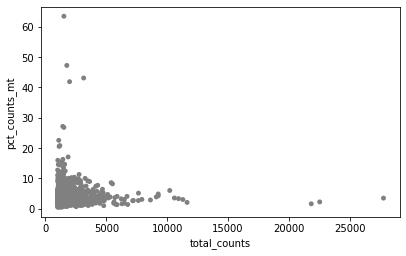

In [12]:
# remove cells with too many mitochondrial genes expressed
adata.var['mt'] = adata.var_names.str.startswith('mt-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
adata = adata[adata.obs.pct_counts_mt < 15, :]

In [13]:
# convert to dataframe
df = adata.to_df()

In [14]:
df

,0610007P14Rik,0610009B22Rik,0610009D07Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610011F06Rik,0610030E20Rik,...,n-R5s33,n-R5s40,n-R5s41,n-R5s43,n-R5s47,n-R5s58,n-R5s71,n-R5s85,n-R5s86,n-R5s88
CCCCAAACACCG,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
TTAACGGTCTGT,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTCAAGATACAG,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
GCTCTTAATATN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
TGATGTTTGACT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTTCTCACACGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GGCTATTGACAC,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTCGCCTTGTAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GAAGCCGAGCCA,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Log normalize

In [15]:
# scale to CPM
sc.pp.normalize_total(adata, target_sum=1e6)

/Users/Joyce/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [16]:
sc.pp.log1p(adata)

## Regress out library size

In [17]:
sc.pp.regress_out(adata, 'total_counts')

## Dimensionality reduction and tSNE

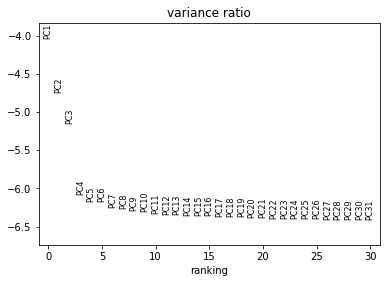

In [18]:
# PCA
sc.pp.pca(adata)

# PCA variance ratio
sc.pl.pca_variance_ratio(adata, n_pcs = 30, log = True)

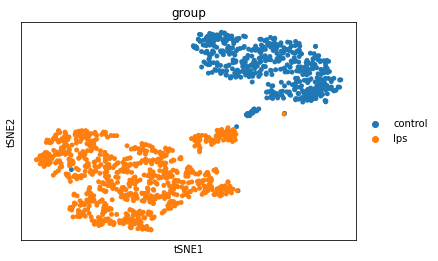

In [19]:
# tSNE on top 4 PCs
sc.tl.tsne(adata, 4)

# 2D tSNE embedding
sc.pl.tsne(adata, color = 'group')

In [20]:
adata

AnnData object with n_obs × n_vars = 1234 × 15866
    obs: 'group', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'mt'
    uns: 'log1p', 'pca', 'tsne', 'group_colors'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'

## Clustering

### k-means

... storing 'kmeans2' as categorical
... storing 'kmeans3' as categorical


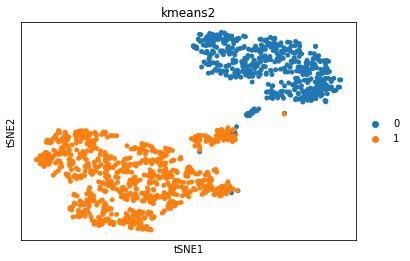

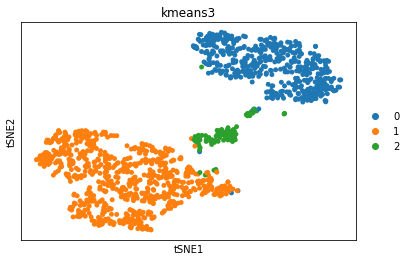

In [44]:
# extract pca coordinates
X_pca = adata.obsm['X_pca']

# kmeans for k = 2,3
for i in range(2,4):
    kmeans = KMeans(n_clusters = i, random_state = 0).fit(X_pca)
    adata.obs[f'kmeans{i}'] = kmeans.labels_.astype(str)
    
# tSNE projection colored by cluster IDs
sc.pl.tsne(adata, color = ['kmeans2'])
sc.pl.tsne(adata, color = ['kmeans3'])

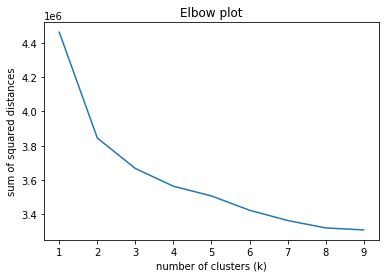

In [22]:
# elbow method to check optimal k
ssd = []
k = range(1,10)
for i in k:
    kmeans = KMeans(n_clusters = i).fit(X_pca)
    ssd.append(kmeans.inertia_) # inertia = sum of square distances of samples to closest cluster center
plt.plot(k, ssd)
plt.xlabel('number of clusters (k)') 
plt.ylabel('sum of squared distances') 
plt.title('Elbow plot')
plt.show()

### leiden

In [23]:
# nearest neighbors
sc.pp.neighbors(adata, n_neighbors = 15, metric = 'manhattan')

# leiden clustering
sc.tl.leiden(adata, resolution = 0.3)

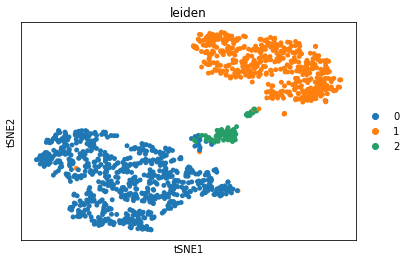

In [24]:
sc.pl.tsne(
    adata, color = 'leiden',
    palette = sc.pl.palettes.vega_20_scanpy
)

## Differential expression analysis

/Users/Joyce/opt/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


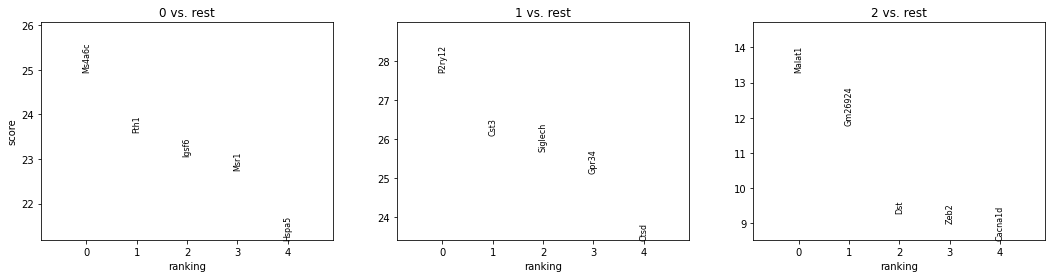

In [25]:
# DEGS
sc.tl.rank_genes_groups(adata, 'leiden', method = 'wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes = 5, sharey = False, key = "wilcoxon")

In [26]:
marker_genes = ['P2ry12','Cst3','Siglech','Gpr34','Ctsd','Fth1','Ms4a6c','Igsf6','Msr1','Hspa5','Malat1','Gm26924','Dst','Zeb2','Cacna1d']

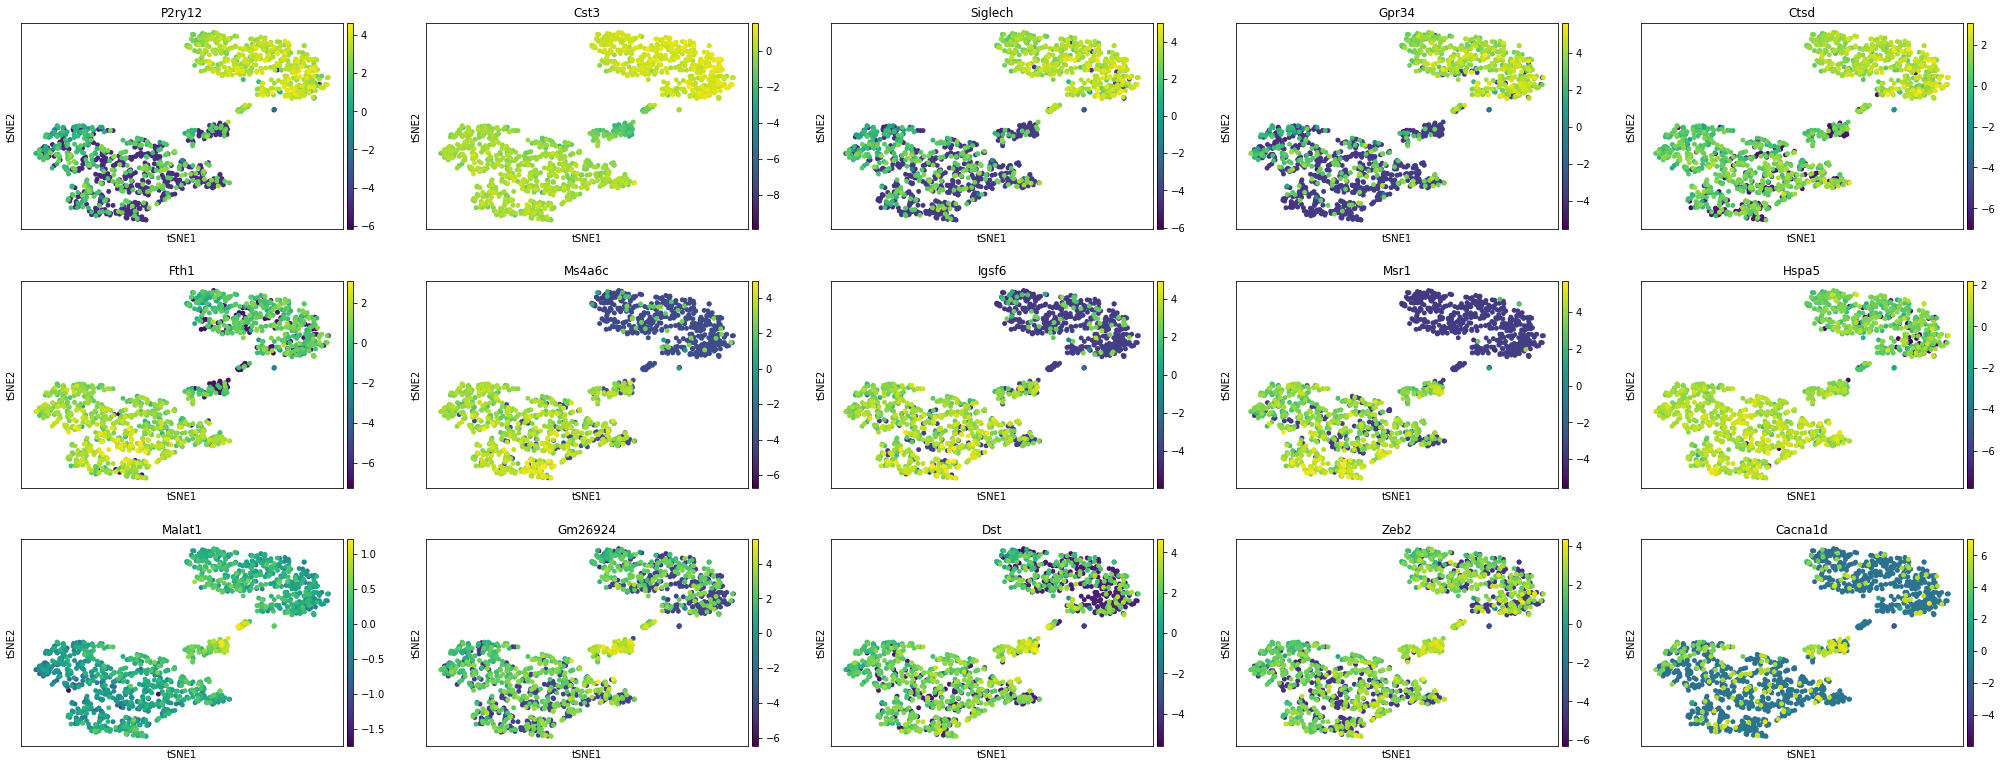

In [27]:
# color embedding with expression of some DEGs
sc.pl.tsne(
    adata, color = marker_genes,
    palette = sc.pl.palettes.vega_20_scanpy,
    ncols=5
)

## Trajectory inference/DPT

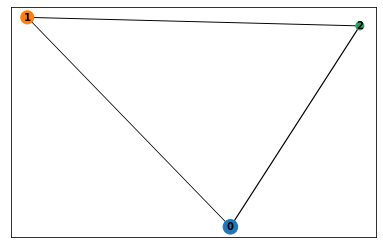

In [28]:
# trajectory inference
sc.tl.paga(adata, groups = 'leiden')
sc.pl.paga(adata, color = ['leiden'])

In [29]:
adata_lps2 = adata[adata.obs.group == 'lps', :]

In [30]:
adata_lps2

View of AnnData object with n_obs × n_vars = 761 × 15866
    obs: 'group', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'total_counts_mt', 'pct_counts_mt', 'kmeans2', 'kmeans3', 'leiden'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'mt'
    uns: 'log1p', 'pca', 'tsne', 'group_colors', 'kmeans2_colors', 'kmeans3_colors', 'neighbors', 'leiden', 'leiden_colors', 'wilcoxon', 'paga', 'leiden_sizes'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

Trying to set attribute `._uns` of view, copying.


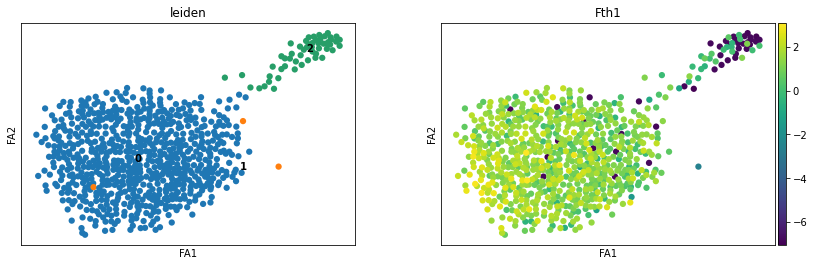

In [31]:
sc.tl.draw_graph(adata_lps2, init_pos = 'paga')
sc.pl.draw_graph(adata_lps2, color = ['leiden', 'Fth1'], legend_loc = 'on data')

In [32]:
adata

AnnData object with n_obs × n_vars = 1234 × 15866
    obs: 'group', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'total_counts_mt', 'pct_counts_mt', 'kmeans2', 'kmeans3', 'leiden'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'mt'
    uns: 'log1p', 'pca', 'tsne', 'group_colors', 'kmeans2_colors', 'kmeans3_colors', 'neighbors', 'leiden', 'leiden_colors', 'wilcoxon', 'paga', 'leiden_sizes'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

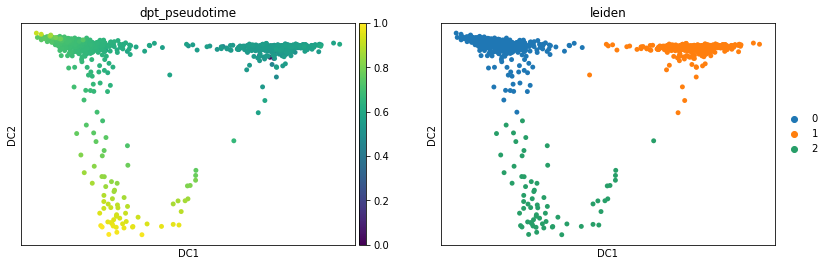

In [33]:
# diffusion pseudotime analysis
adata.uns['iroot'] = np.flatnonzero(adata.obs['group'] == 'control')[0]
sc.tl.diffmap(adata)
sc.tl.dpt(adata, n_branchings = 0, n_dcs = 10)
sc.pl.diffmap(adata, color = ['dpt_pseudotime','leiden'])

## Label microglial cell states

In [34]:
new_cluster_names = ['activated microglia','homeostatic microglia','intermediate activated microglia']
adata.rename_categories('leiden', new_cluster_names)

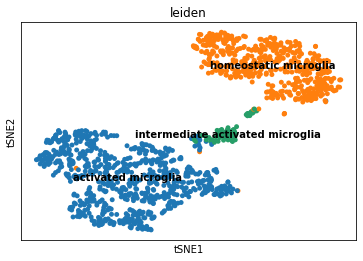

In [35]:
sc.pl.tsne(adata, color='leiden', legend_loc='on data')

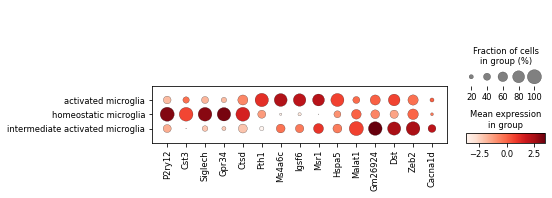

In [36]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden');

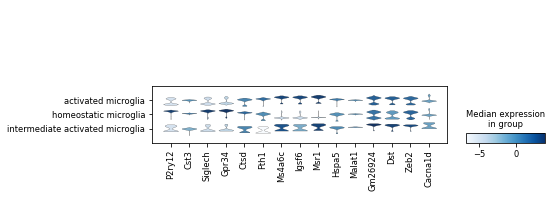

In [37]:
sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);

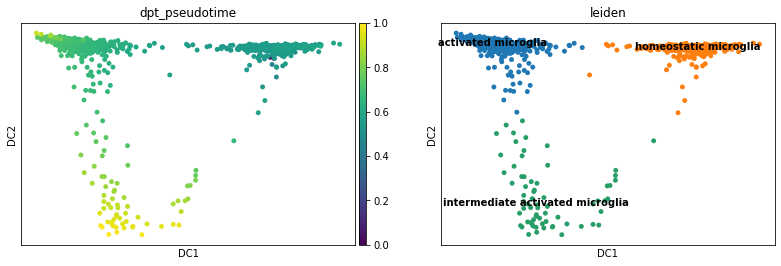

In [38]:
sc.pl.diffmap(adata, color = ['dpt_pseudotime','leiden'],legend_loc='on data')

## Prepare counts and metadata files for RCTD

In [39]:
# transpose to genes x cells
df = df.transpose()

In [40]:
df

,CCCCAAACACCG,TTAACGGTCTGT,CTCAAGATACAG,GCTCTTAATATN,TGATGTTTGACT,GACGTAAATTCT,TCAGGCAATACA,GATGCCCCCGAA,TCCGCTGTTCTT,TTCGTTCGGAAC,...,TCTTTTGGACCC,AACCCCGCCTTC,GCCAGATGTCTT,GGTCGCCATGAG,GGCGAAGAACTC,GTTCTCACACGT,GGCTATTGACAC,GTCGCCTTGTAT,GAAGCCGAGCCA,GGTCTTACTGTT
0610007P14Rik,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610009B22Rik,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610009D07Rik,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
0610009E02Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610009L18Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n-R5s58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n-R5s71,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n-R5s85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n-R5s86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
df.to_csv('dge.csv')

In [42]:
adata.obs

,group,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_counts,total_counts_mt,pct_counts_mt,kmeans2,kmeans3,leiden,dpt_pseudotime
CCCCAAACACCG,control,5700,8.648397,21827.0,9.990949,21.134375,27.090301,34.425253,47.509965,21827.0,355.0,1.626426,0,2,homeostatic microglia,0.000000
TTAACGGTCTGT,control,5833,8.671458,22520.0,10.022203,21.500888,27.295737,34.560391,47.673179,22520.0,506.0,2.246892,0,2,homeostatic microglia,0.120298
CTCAAGATACAG,control,3721,8.222016,11287.0,9.331495,24.018783,30.388943,38.610791,53.362275,11287.0,343.0,3.038894,0,0,homeostatic microglia,0.527460
GCTCTTAATATN,control,4129,8.326033,11633.0,9.361687,20.596579,26.803060,34.909310,49.325196,11633.0,243.0,2.088885,0,0,homeostatic microglia,0.531156
TGATGTTTGACT,control,3363,8.120886,9270.0,9.134646,26.245955,32.405609,40.442287,55.167206,9270.0,396.0,4.271845,0,0,homeostatic microglia,0.527236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTTCTCACACGT,lps,1106,7.009409,1783.0,7.486613,29.949523,37.408861,48.625911,66.012339,1783.0,52.0,2.916433,1,1,activated microglia,0.700455
GGCTATTGACAC,lps,793,6.677083,1140.0,7.039660,27.105263,35.877193,47.982456,74.298246,1140.0,42.0,3.684210,1,1,activated microglia,0.647088
GTCGCCTTGTAT,lps,780,6.660575,1202.0,7.092574,28.785358,38.435940,51.747088,76.705491,1202.0,34.0,2.828619,1,1,activated microglia,0.702998
GAAGCCGAGCCA,lps,888,6.790097,1232.0,7.117206,23.620130,31.980519,44.155844,68.506494,1232.0,19.0,1.542208,1,1,activated microglia,0.692313


In [43]:
adata.obs['leiden'].to_csv('metadata.csv')